In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('udemy.csv')

In [3]:
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5,2017-01-18T20:58:58Z,Business Finance
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39.0,2017-03-09T16:34:20Z,Business Finance
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5,2016-12-19T19:26:30Z,Business Finance
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3.0,2017-05-30T20:07:24Z,Business Finance
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2.0,2016-12-13T14:57:18Z,Business Finance


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3678 entries, 0 to 3677
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   course_id            3678 non-null   int64  
 1   course_title         3678 non-null   object 
 2   url                  3678 non-null   object 
 3   is_paid              3678 non-null   bool   
 4   price                3678 non-null   int64  
 5   num_subscribers      3678 non-null   int64  
 6   num_reviews          3678 non-null   int64  
 7   num_lectures         3678 non-null   int64  
 8   level                3678 non-null   object 
 9   content_duration     3678 non-null   float64
 10  published_timestamp  3678 non-null   object 
 11  subject              3678 non-null   object 
dtypes: bool(1), float64(1), int64(5), object(5)
memory usage: 319.8+ KB


In [5]:
df.isnull().sum()

course_id              0
course_title           0
url                    0
is_paid                0
price                  0
num_subscribers        0
num_reviews            0
num_lectures           0
level                  0
content_duration       0
published_timestamp    0
subject                0
dtype: int64

In [6]:
df.describe()

,course_id,price,num_subscribers,num_reviews,num_lectures,content_duration
count,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3678.000000
mean,6.759720e+05,66.049483,3197.150625,156.259108,40.108755,4.094517
std,3.432732e+05,61.005755,9504.117010,935.452044,50.383346,6.053840
min,8.324000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.076925e+05,20.000000,111.000000,4.000000,15.000000,1.000000
50%,6.879170e+05,45.000000,911.500000,18.000000,25.000000,2.000000
75%,9.613555e+05,95.000000,2546.000000,67.000000,45.750000,4.500000
max,1.282064e+06,200.000000,268923.000000,27445.000000,779.000000,78.500000


# in which month courses gets uploaded the most

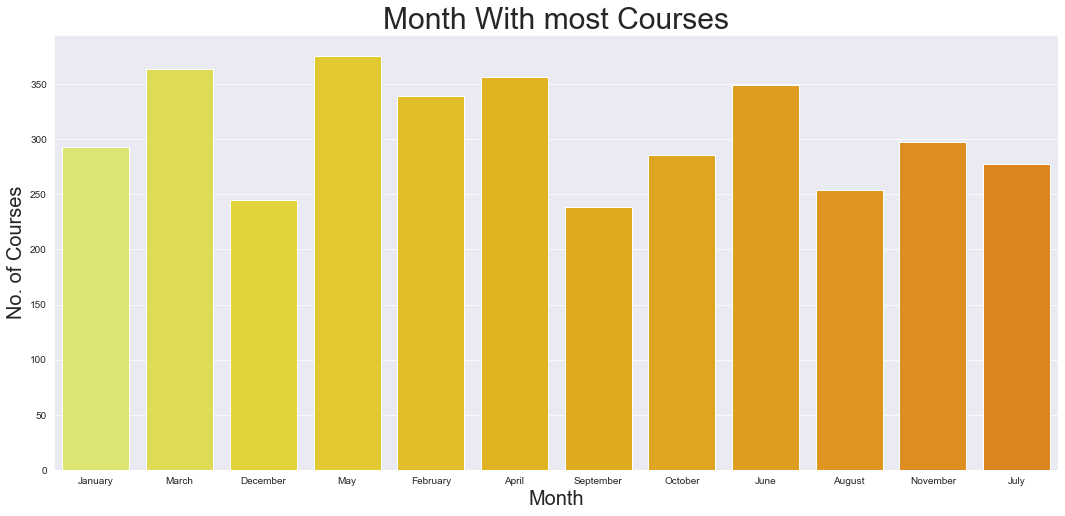

In [7]:
df['published_timestamp'] =  pd.to_datetime(df['published_timestamp'])
df['month'] = df['published_timestamp'].dt.month_name()


plt.figure(figsize = (18,8))
sns.set_style("darkgrid")
ax = sns.countplot(df['month'],palette = 'Wistia')
ax.set_xlabel('Month', fontsize = 20)
ax.set_ylabel('No. of Courses', fontsize = 20)
ax.set_title('Month With most Courses', fontsize = 30)

plt.show()


# Subject wise, courses uploaded in which months

how much courses are getting uploaded of a subject in a particulr month 

In [8]:
df_bf = df.loc[df['subject'] == "Business Finance"]
df_wd = df.loc[df['subject'] == "Web Development"]
df_gd = df.loc[df['subject'] == "Graphic Design"]
df_mi = df.loc[df['subject'] == "Musical Instruments"]

In [9]:
bf_month = df_bf['month'].value_counts()
wd_month = df_wd['month'].value_counts()
gd_month = df_gd['month'].value_counts()
mi_month = df_mi['month'].value_counts()

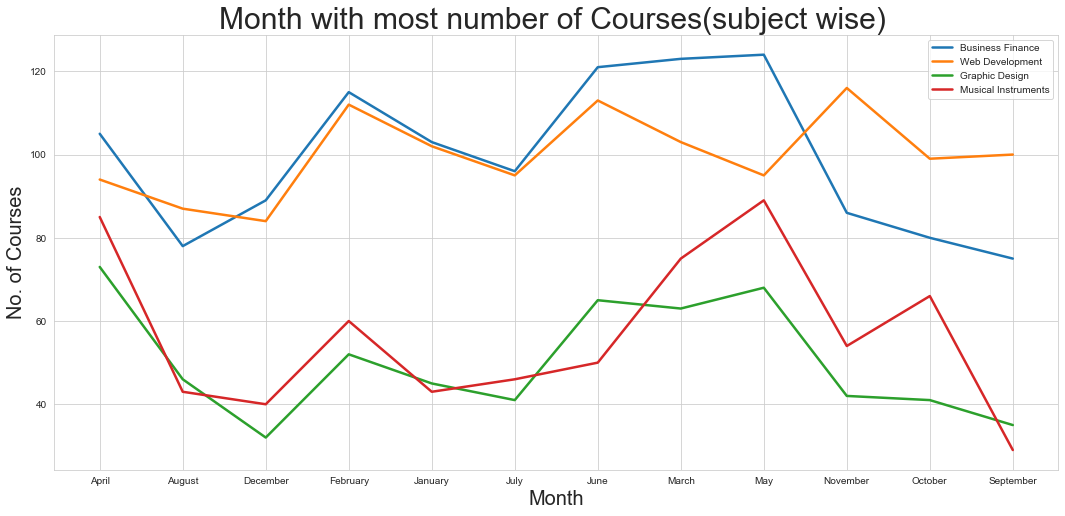

In [10]:
plt.rcParams['figure.figsize'] = (18, 8)
sns.set_style('whitegrid')
ax = sns.lineplot(x = bf_month.index  , y = bf_month.values, linewidth=2.5,label = 'Business Finance')
ax1 = sns.lineplot(x = wd_month.index  , y = wd_month.values, linewidth=2.5,label = "Web Development")
ax2 = sns.lineplot(x = gd_month.index  , y = gd_month.values, linewidth=2.5,label = "Graphic Design")
ax3 = sns.lineplot(x = mi_month.index  , y = mi_month.values, linewidth=2.5,label = "Musical Instruments")
ax.set_xlabel('Month', fontsize =20)
ax.set_ylabel('No. of Courses',fontsize =20)
ax.set_title('Month with most number of Courses(subject wise) ', fontsize = 30)
plt.show()

# in which year most courses gets uploaded

year with most number of upload

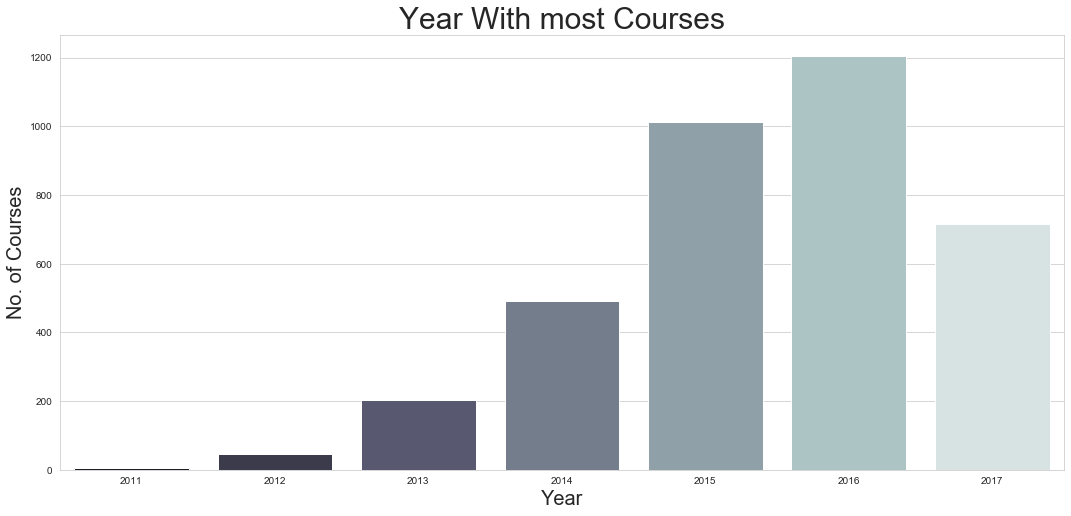

In [11]:
df['year'] = df['published_timestamp'].dt.year


plt.figure(figsize = (18,8))
# sns.set_style("darkgrid")
ax = sns.countplot(df['year'],palette = 'bone')
ax.set_xlabel('Year', fontsize = 20)
ax.set_ylabel('No. of Courses', fontsize = 20)
ax.set_title('Year With most Courses', fontsize = 30)

plt.show()

# Subject Analysis

removing outliers by using IQR

In [41]:
def removing_outlier(column, compare_column, dfname):

    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    lower_limit = q1 - 1.5*iqr
    upper_limit = q3 + 1.5*iqr
    
    dfname = df[(df[column]>lower_limit)  & (df[column]<upper_limit)]
    
    plt.figure(figsize = (18,8))
    ax = sns.boxplot(x = compare_column , y = column, data = dfname)
    
    ax.set_xlabel('Subject', fontsize = 20)
    ax.set_ylabel('Counts of Reviews', fontsize = 20)
    
    return plt.show()

Number Reviews Subject Wise

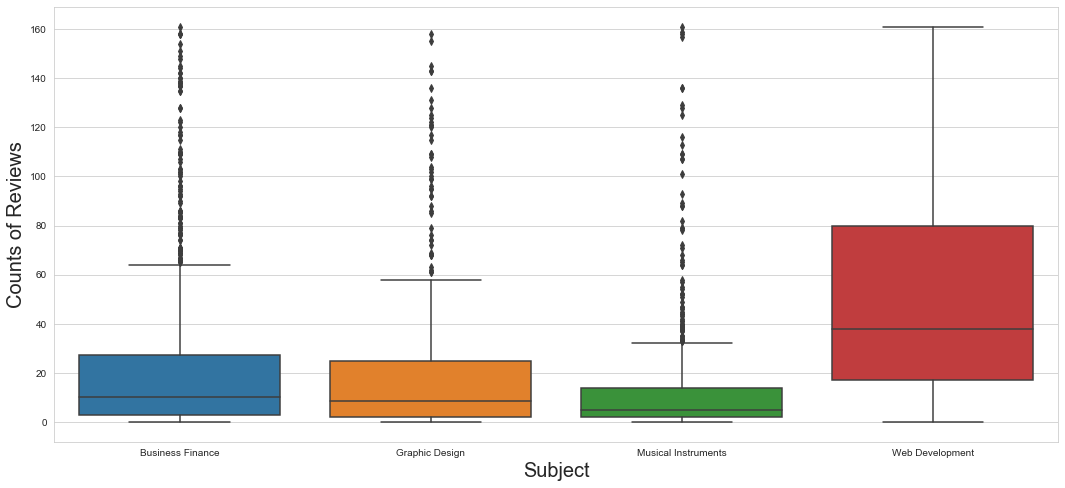

In [42]:
reviews_no_out = ''
removing_outlier('num_reviews','subject',reviews_no_out)

Number Subscribers Subject Wise

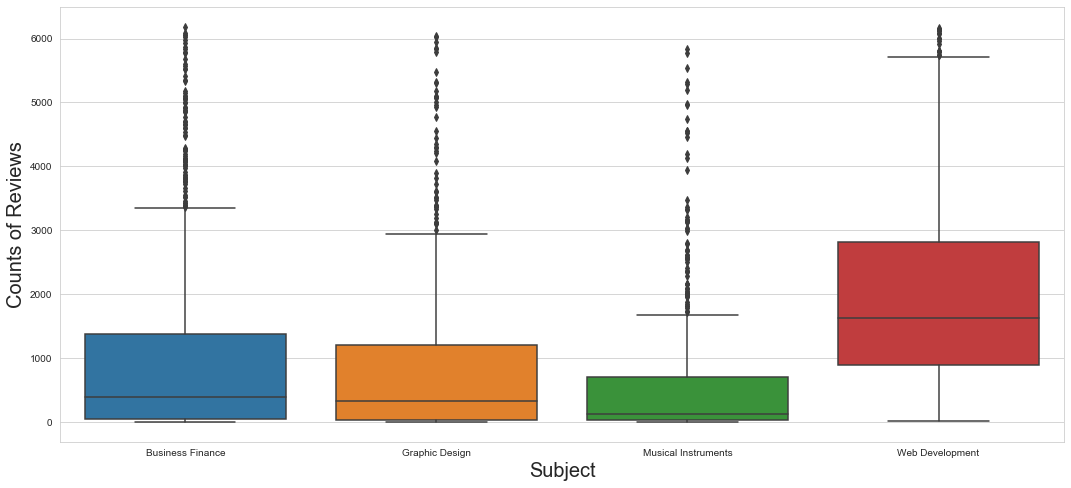

In [43]:
subs_no_out = ''

removing_outlier('num_subscribers','subject',subs_no_out)

Number of lectures, Subject Wise

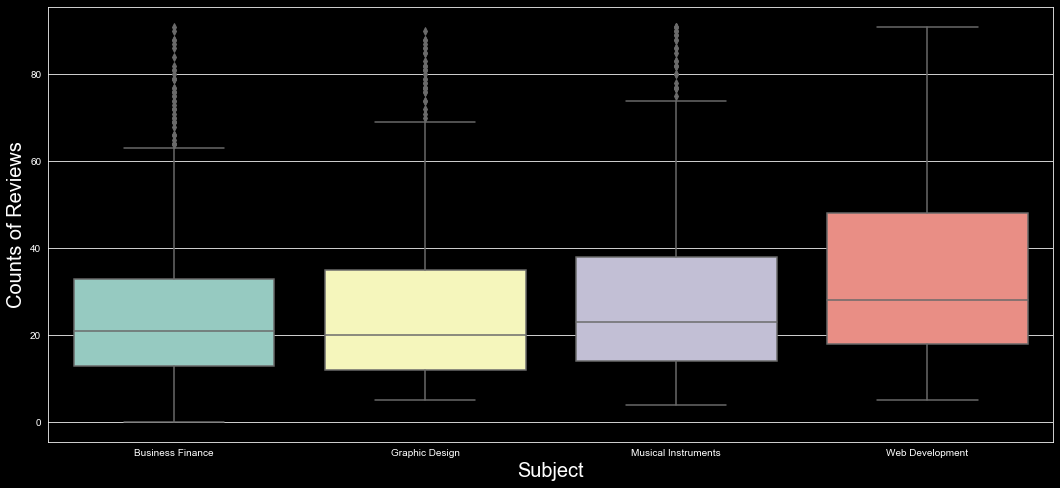

In [50]:
lec_no_out = ''

removing_outlier('num_lectures','subject',lec_no_out)

# Courses which are free and have more subcribers

In [16]:
subs_free = df.loc[(df['num_subscribers']) & (df['is_paid'] == False)]

In [17]:
subs_free.sort_values('num_subscribers',ascending = False).head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,month,year
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,February,2013
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,June,2013
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,April,2014
2589,473160,Web Design for Web Developers: Build Beautiful...,https://www.udemy.com/web-design-secrets/,False,0,98867,6512,20,All Levels,3.0,2015-04-13 18:29:47+00:00,Web Development,April,2015
3289,130064,Practical PHP: Master the Basics and Code Dyna...,https://www.udemy.com/code-dynamic-websites/,False,0,83737,4598,45,All Levels,6.5,2014-07-19 03:02:05+00:00,Web Development,July,2014


# which subject has most number of subscribers

In [18]:
gk = df.groupby('subject')

In [19]:
gk_sum = gk['num_subscribers'].sum()

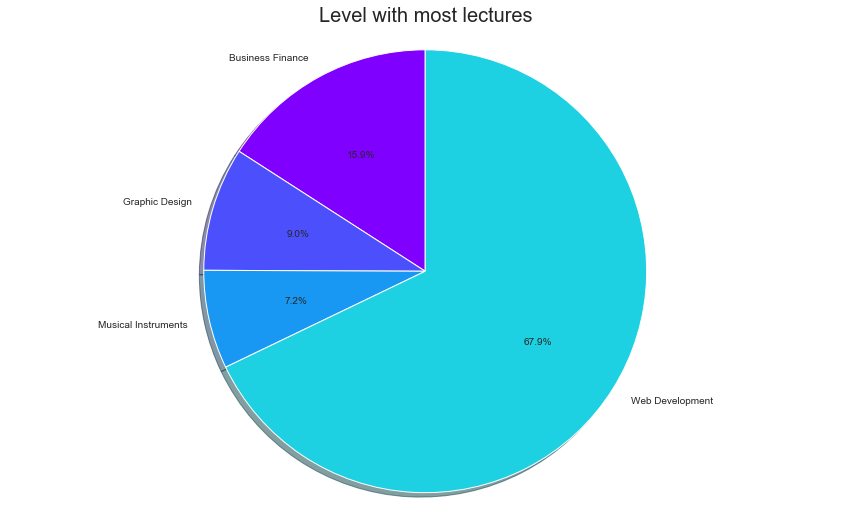

In [20]:
labels = gk_sum.index
sizes = gk_sum.values
colors = plt.cm.rainbow(np.linspace(0,5))

# explode = (0.2,0.1, 0, 0,0,0,0,0,0,0,0,0)
plt.rcParams['figure.figsize'] = (15,9)

plt.pie(sizes, labels=labels,  autopct='%1.1f%%',shadow=True, startangle=90, colors = colors)

plt.axis('equal')  
plt.title("Level with most lectures", fontsize =20)
plt.show()

# Best Courses of Particular Subject

In [21]:
def free_courses(subject):
    df_free =  df.loc[(df['subject'] == subject) & (df['is_paid'] == False)]

    df_free.drop(['is_paid','price','url','published_timestamp'], axis = 1,inplace = True)

    return df_free.sort_values('num_subscribers',ascending = False).head()

Best Courses of Business Finance

In [22]:
free_courses('Business Finance')


,course_id,course_title,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month,year
492,49798,Bitcoin or How I Learned to Stop Worrying and ...,65576,936,24,All Levels,8.0,Business Finance,April,2013
143,48841,Accounting in 60 Minutes - A Brief Introduction,56659,4397,16,Beginner Level,1.5,Business Finance,April,2013
103,133536,Stock Market Investing for Beginners,50855,2698,15,Beginner Level,1.5,Business Finance,December,2013
119,151668,Introduction to Financial Modeling,29167,1463,8,Intermediate Level,1.5,Business Finance,May,2014
494,97338,Forex Basics,22344,712,26,Beginner Level,3.5,Business Finance,October,2013


Best Courses of Graphic Design

In [23]:
free_courses('Graphic Design')

,course_id,course_title,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month,year
1461,348116,Photoshop In-Depth: Master all of Photoshop's ...,53851,1779,45,All Levels,4.500000,Graphic Design,November,2014
1286,17349,Figure Drawing From Life Using The Reilly Tech...,47811,1041,22,All Levels,2.500000,Graphic Design,May,2012
1390,399938,Professional Logo Design in Adobe Illustrator,44044,1563,45,All Levels,7.500000,Graphic Design,January,2015
1367,22445,Learn to Design a Letterhead - A Beginners Course,24687,423,13,All Levels,0.733333,Graphic Design,October,2012
1409,660876,Graphic Design - An Overview of the Field,23229,2215,12,Beginner Level,1.000000,Graphic Design,November,2015


Best Courses of Musical Instruments

In [24]:
free_courses('Musical Instruments')

,course_id,course_title,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month,year
1896,19421,Free Beginner Electric Guitar Lessons,101154,1042,95,Beginner Level,4.500000,Musical Instruments,June,2012
2004,41884,Getting Started with Playing Guitar,47652,1141,26,Beginner Level,4.000000,Musical Instruments,May,2013
1923,583752,Introduction to Piano - By PGN Piano!,14922,772,8,Beginner Level,0.666667,Musical Instruments,August,2015
1901,198690,Acoustic Guitar Basics,14495,224,21,Beginner Level,2.000000,Musical Instruments,August,2014
1950,1191750,"Jazz Guitar Tips, Tricks and Licks",9351,331,21,Intermediate Level,2.000000,Musical Instruments,May,2017


Best Courses of Web Development

In [25]:
free_courses('Web Development')

,course_id,course_title,num_subscribers,num_reviews,num_lectures,level,content_duration,subject,month,year
2827,41295,Learn HTML5 Programming From Scratch,268923,8629,45,All Levels,10.5,Web Development,February,2013
3032,59014,Coding for Entrepreneurs Basic,161029,279,27,Beginner Level,3.5,Web Development,June,2013
2783,173548,Build Your First Website in 1 Week with HTML5 ...,120291,5924,30,Beginner Level,3.0,Web Development,April,2014
2589,473160,Web Design for Web Developers: Build Beautiful...,98867,6512,20,All Levels,3.0,Web Development,April,2015
3289,130064,Practical PHP: Master the Basics and Code Dyna...,83737,4598,45,All Levels,6.5,Web Development,July,2014


# Popular Courses

In [26]:
df['popularity'] = df['num_subscribers'] + df['num_reviews']

In [27]:
df.sort_values('popularity', ascending=False).head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,month,year,popularity
2827,41295,Learn HTML5 Programming From Scratch,https://www.udemy.com/learn-html5-programming-...,False,0,268923,8629,45,All Levels,10.5,2013-02-14 07:03:41+00:00,Web Development,February,2013,277552
3032,59014,Coding for Entrepreneurs Basic,https://www.udemy.com/coding-for-entrepreneurs...,False,0,161029,279,27,Beginner Level,3.5,2013-06-09 15:51:55+00:00,Web Development,June,2013,161308
3230,625204,The Web Developer Bootcamp,https://www.udemy.com/the-web-developer-bootcamp/,True,200,121584,27445,342,All Levels,43.0,2015-11-02 21:13:27+00:00,Web Development,November,2015,149029
3232,764164,The Complete Web Developer Course 2.0,https://www.udemy.com/the-complete-web-develop...,True,200,114512,22412,304,All Levels,30.5,2016-03-08 22:28:36+00:00,Web Development,March,2016,136924
2783,173548,Build Your First Website in 1 Week with HTML5 ...,https://www.udemy.com/build-your-first-website...,False,0,120291,5924,30,Beginner Level,3.0,2014-04-08 16:21:30+00:00,Web Development,April,2014,126215


# difficulty level for subjects

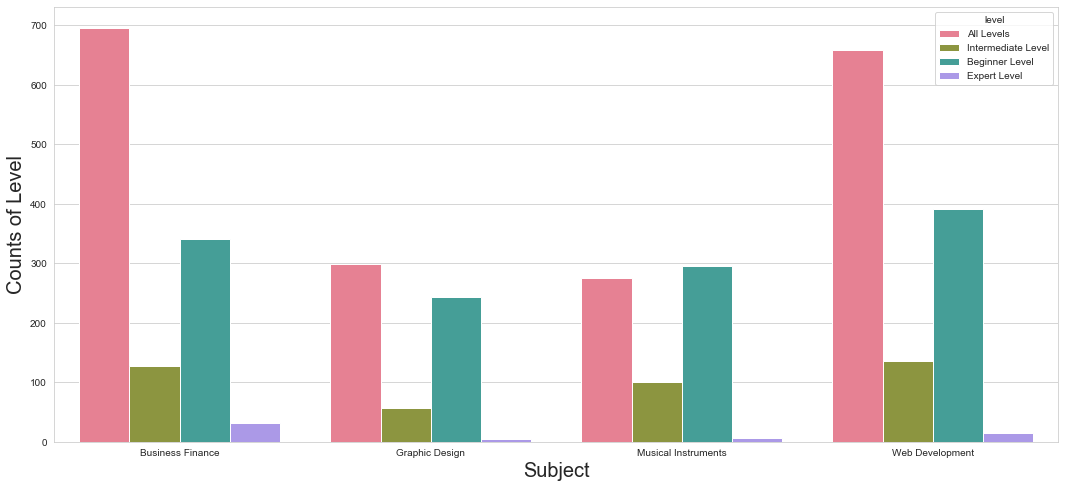

In [28]:
plt.figure(figsize = (18,8))
ax = sns.countplot(df['subject'], hue = df['level'],palette ='husl')
ax.set_xlabel('Subject', fontsize = 20)
ax.set_ylabel('Counts of Level', fontsize = 20)
# ax.set_title('Year With most Courses', fontsize = 30)

plt.show()

# Content Duration of Subjects

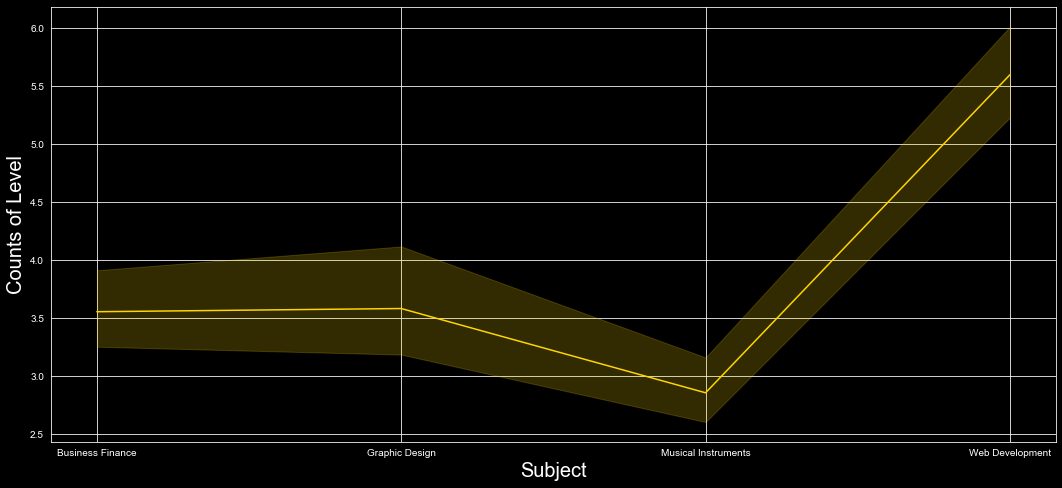

In [48]:
plt.style.use('dark_background')
plt.figure(figsize = (18,8))
ax = sns.lineplot(x = df['subject'], y = df['content_duration'], color = 'gold')
ax.set_xlabel('Subject', fontsize = 20)
ax.set_ylabel('Counts of Level', fontsize = 20)

plt.show()